170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3377 - loss: 1.7844 - val_accuracy: 0.5255 - val_loss: 1.3037
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.5573 - loss: 1.2388 - val_accuracy: 0.5854 - val_loss: 1.1864
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.6218 - loss: 1.0702 - val_accuracy: 0.6304 - val_loss: 1.0371
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6659 - loss: 0.9496 - val_accuracy: 0.6568 - val_loss: 0.9722
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.6964 - loss: 0.8712 - val_accuracy: 0.6810 - val_loss: 0.9148
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 50ms/step - accuracy: 0.7171 - loss: 0.8011 - val_accuracy: 0.6820 - val_loss: 0.9056
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.7353 - loss: 0.7576 - val_accuracy: 0.6953 - val_loss: 0.8888
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - ac

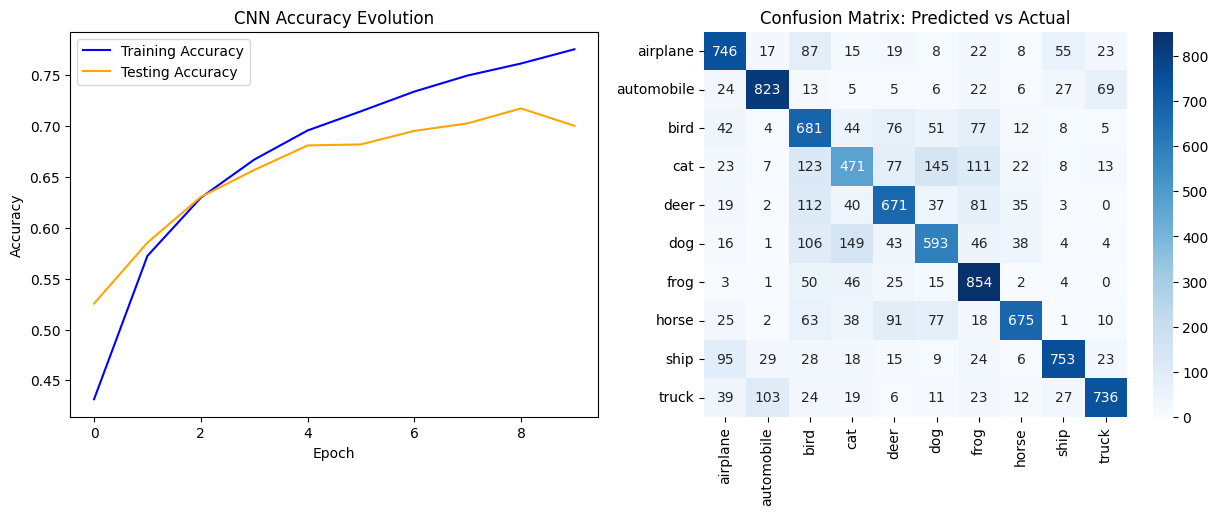

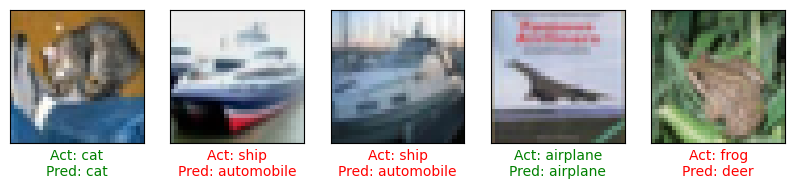

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Load and Preprocess
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 2. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # 10 classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 3. Train
print("Training CNN...")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels), verbose=1)

# 4. Visual Performance Analysis
plt.figure(figsize=(15, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('CNN Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Confusion Matrix
plt.subplot(1, 2, 2)
y_pred = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix: Predicted vs Actual')
plt.show()

# 5. Visualizing Predictions
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    actual = class_names[test_labels[i][0]]
    predicted = class_names[y_pred[i]]
    plt.xlabel(f"Act: {actual}\nPred: {predicted}", color=("green" if actual==predicted else "red"))
plt.show()